<h3>Students names and ids</h3>
<h4>Fernando Limón Flores A00819824</h4>
<h4>Roger Eduardo Vazquez Tuz A00820409</h4>

In [107]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
train_x_orig, train_y, test_x_orig, test_y, validation_x_orig, validation_y = load_data()

y = 0


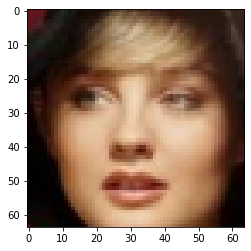

In [108]:
# Example of a picture
index = 100
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]))

In [26]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
m_validation = validation_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Number of validation examples: " + str(m_validation))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))
print ("validation_x_orig shape: " + str(validation_x_orig.shape))
print ("validation_y shape: " + str(validation_y.shape))

Number of training examples: 1000
Number of testing examples: 100
Number of validation examples: 100
Each image is of size: (64, 64, 3)
train_x_orig shape: (1000, 64, 64, 3)
train_y shape: (1, 1000)
test_x_orig shape: (100, 64, 64, 3)
test_y shape: (1, 100)
validation_x_orig shape: (100, 64, 64, 3)
validation_y shape: (1, 100)


In [94]:
# Reshape the training, test and validation examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
validation_x_flatten = validation_x_orig.reshape(validation_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
validation_x = validation_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("validation_x's shape: " + str(validation_x.shape))

train_x's shape: (12288, 1000)
test_x's shape: (12288, 100)
validation_x's shape: (12288, 100)


In [43]:
#Function to calculate bias and variance
def calculateBiasVariance(train_accuracy, test_accuracy):
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    
    variance = abs(train_error - test_error)
    
    return "The bias is: " + str(train_error), "The variance is: " + str(variance)

<h1>Training with the original net</h1>

In [80]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [88]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.66410993685507
Cost after iteration 200: 0.44491854262231084
Cost after iteration 300: 0.29513249135387165
Cost after iteration 400: 0.2402305322344182
Cost after iteration 500: 0.208125341013496
Cost after iteration 600: 0.18465230493511076
Cost after iteration 700: 0.16591221941331072
Cost after iteration 800: 0.1503986295403298
Cost after iteration 900: 0.13695895252045906
Cost after iteration 1000: 0.12494835606062728
Cost after iteration 1100: 0.11413356376470957
Cost after iteration 1200: 0.10433583400825591
Cost after iteration 1300: 0.09547891017863977
Cost after iteration 1400: 0.08756805571394274
Cost after iteration 1500: 0.08050292784179146
Cost after iteration 1600: 0.07423415626382414
Cost after iteration 1700: 0.06863754106130009
Cost after iteration 1800: 0.06362529794063376
Cost after iteration 1900: 0.05912240023353427
Cost after iteration 2000: 0.055077729135969804
Cost after iteration 2100: 0.051

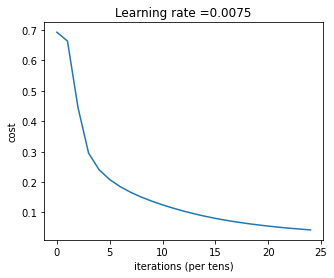

In [16]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [17]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9950000000000004


In [18]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.95


In [44]:
calculateBiasVariance(0.9950000000000004, 0.95)

('The bias is: 0.0050000000000000044', 'The variance is: 0.04500000000000004')

<h1>Improving the architecture of the neural net</h1>

<h2>First Experiment (Increasing Learning Rate)</h2>

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.6922522620383956
Cost after iteration 200: 0.6556856711418672
Cost after iteration 300: 0.3348491245786463
Cost after iteration 400: 0.26260237885471716
Cost after iteration 500: 0.23804061947667762
Cost after iteration 600: 0.18096517941112483


/Users/fernandolimonflores/Desktop/Final project/dnn_app_utils_v3.py:266: RuntimeWarning: divide by zero encountered in log
  cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
<ipython-input-81-20054f4b4dbe>:52: RuntimeWarning: invalid value encountered in true_divide
  dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
/Users/fernandolimonflores/Desktop/Final project/dnn_app_utils_v3.py:59: RuntimeWarning: invalid value encountered in less_equal
  dZ[Z <= 0] = 0


Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
Cost after iteration 2000: nan
Cost after iteration 2100: nan
Cost after iteration 2200: nan
Cost after iteration 2300: nan
Cost after iteration 2400: nan


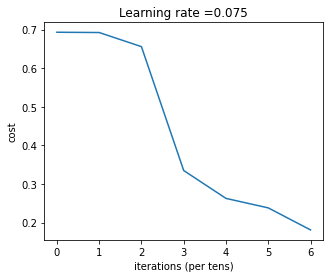

In [82]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.075, num_iterations = 2500, print_cost=True)

In [83]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.5


In [84]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.5


In [85]:
calculateBiasVariance(0.5, 0.5)

('The bias is: 0.5', 'The variance is: 0.0')

<h2>Second Experiment (Decreasing Learning Rate)</h2>

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.6925229158223515
Cost after iteration 200: 0.6919136407488923
Cost after iteration 300: 0.6910038179097542
Cost after iteration 400: 0.6895323828131508
Cost after iteration 500: 0.6877068817563413
Cost after iteration 600: 0.6851891945026557
Cost after iteration 700: 0.6817948713664616
Cost after iteration 800: 0.6772326112760693
Cost after iteration 900: 0.6711641703381586
Cost after iteration 1000: 0.6632687431912445
Cost after iteration 1100: 0.6532073349982817
Cost after iteration 1200: 0.6406796699738575
Cost after iteration 1300: 0.6253394707418621
Cost after iteration 1400: 0.6066877958768273
Cost after iteration 1500: 0.58420281764139
Cost after iteration 1600: 0.5578829033810568
Cost after iteration 1700: 0.5287700367800259
Cost after iteration 1800: 0.4985769295934156
Cost after iteration 1900: 0.4690458420588657
Cost after iteration 2000: 0.4415124830451579
Cost after iteration 2100: 0.4167396972293667
Co

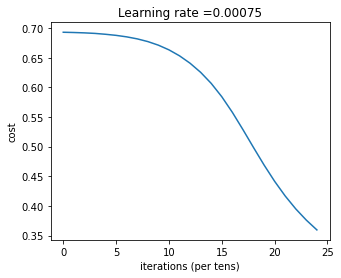

In [49]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.00075, num_iterations = 2500, print_cost=True)

In [50]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.8980000000000004


In [51]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.8899999999999999


In [54]:
calculateBiasVariance(0.8980000000000004, 0.8899999999999999)

('The bias is: 0.10199999999999965', 'The variance is: 0.008000000000000451')

<h2>Third Experiment (Increasing Number Of Iterations)</h2>

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.66410993685507
Cost after iteration 200: 0.44491854262231084
Cost after iteration 300: 0.29513249135387165
Cost after iteration 400: 0.2402305322344182
Cost after iteration 500: 0.208125341013496
Cost after iteration 600: 0.18465230493511076
Cost after iteration 700: 0.16591221941331072
Cost after iteration 800: 0.1503986295403298
Cost after iteration 900: 0.13695895252045906
Cost after iteration 1000: 0.12494835606062728
Cost after iteration 1100: 0.11413356376470957
Cost after iteration 1200: 0.10433583400825591
Cost after iteration 1300: 0.09547891017863977
Cost after iteration 1400: 0.08756805571394274
Cost after iteration 1500: 0.08050292784179146
Cost after iteration 1600: 0.07423415626382414
Cost after iteration 1700: 0.06863754106130009
Cost after iteration 1800: 0.06362529794063376
Cost after iteration 1900: 0.05912240023353427
Cost after iteration 2000: 0.055077729135969804
Cost after iteration 2100: 0.051

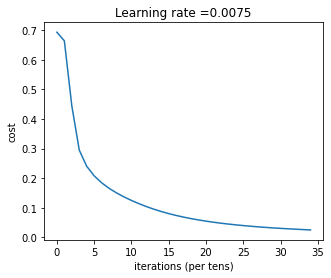

In [52]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.0075, num_iterations = 3500, print_cost=True)

In [55]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9970000000000004


In [56]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.95


In [57]:
calculateBiasVariance(0.9970000000000004, 0.95)

('The bias is: 0.0029999999999995586', 'The variance is: 0.047000000000000486')

<h2>Fourth Experiment (Decreasing Number Of Iterations)</h2>

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.66410993685507
Cost after iteration 200: 0.44491854262231084
Cost after iteration 300: 0.29513249135387165
Cost after iteration 400: 0.2402305322344182
Cost after iteration 500: 0.208125341013496
Cost after iteration 600: 0.18465230493511076
Cost after iteration 700: 0.16591221941331072
Cost after iteration 800: 0.1503986295403298
Cost after iteration 900: 0.13695895252045906
Cost after iteration 1000: 0.12494835606062728
Cost after iteration 1100: 0.11413356376470957
Cost after iteration 1200: 0.10433583400825591
Cost after iteration 1300: 0.09547891017863977
Cost after iteration 1400: 0.08756805571394274


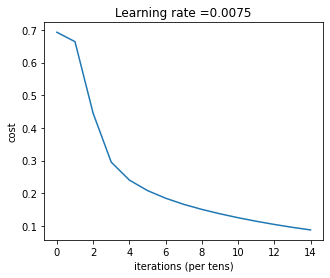

In [58]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.0075, num_iterations = 1500, print_cost=True)

In [59]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9760000000000004


In [60]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.95


In [62]:
calculateBiasVariance(0.9760000000000004, 0.95)

('The bias is: 0.023999999999999577', 'The variance is: 0.026000000000000467')

<h2>Fifth Experiment (Increasing Number Of Layers)</h2>

In [63]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [64]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.729500
Cost after iteration 100: 0.468665
Cost after iteration 200: 0.391068
Cost after iteration 300: 0.349627
Cost after iteration 400: 0.312517
Cost after iteration 500: 0.281914
Cost after iteration 600: 0.256966
Cost after iteration 700: 0.232121
Cost after iteration 800: 0.206998
Cost after iteration 900: 0.190683
Cost after iteration 1000: 0.174468
Cost after iteration 1100: 0.159672
Cost after iteration 1200: 0.147060
Cost after iteration 1300: 0.136455
Cost after iteration 1400: 0.127295
Cost after iteration 1500: 0.118651
Cost after iteration 1600: 0.110554
Cost after iteration 1700: 0.104241
Cost after iteration 1800: 0.097547
Cost after iteration 1900: 0.092097
Cost after iteration 2000: 0.086736
Cost after iteration 2100: 0.082340
Cost after iteration 2200: 0.078081
Cost after iteration 2300: 0.074759
Cost after iteration 2400: 0.070874


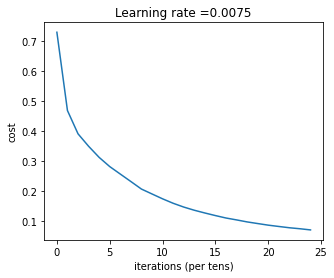

In [65]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [67]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9950000000000004


In [68]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9299999999999999


In [69]:
calculateBiasVariance(0.9950000000000004, 0.9299999999999999)

('The bias is: 0.00499999999999956', 'The variance is: 0.0650000000000005')

<h2>Sixth Experiment (Increasing Number Of Neurons In Each Layer)</h2>

In [70]:
### CONSTANTS ###
layers_dims = [12288, 21, 9, 7, 1] #  4-layer model

Cost after iteration 0: 0.691196
Cost after iteration 100: 0.518235
Cost after iteration 200: 0.320961
Cost after iteration 300: 0.249876
Cost after iteration 400: 0.208071
Cost after iteration 500: 0.179463
Cost after iteration 600: 0.146103
Cost after iteration 700: 0.127742
Cost after iteration 800: 0.113466
Cost after iteration 900: 0.102737
Cost after iteration 1000: 0.113512
Cost after iteration 1100: 0.073802
Cost after iteration 1200: 0.067011
Cost after iteration 1300: 0.052434
Cost after iteration 1400: 0.044596
Cost after iteration 1500: 0.038465
Cost after iteration 1600: 0.033808
Cost after iteration 1700: 0.029657
Cost after iteration 1800: 0.025975
Cost after iteration 1900: 0.022631
Cost after iteration 2000: 0.019764
Cost after iteration 2100: 0.017293
Cost after iteration 2200: 0.015049
Cost after iteration 2300: 0.013229
Cost after iteration 2400: 0.011838


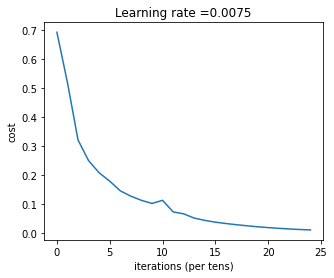

In [71]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [72]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9980000000000004


In [73]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.94


In [74]:
calculateBiasVariance(0.9980000000000004, 0.94)

('The bias is: 0.0019999999999995577', 'The variance is: 0.058000000000000496')

<h2>Seventh Experiment (Decreasing Number Of Neurons In Each Layer)</h2>

In [75]:
### CONSTANTS ###
layers_dims = [12288, 10, 4, 3, 1] #  4-layer model

Cost after iteration 0: 0.690997
Cost after iteration 100: 0.598067
Cost after iteration 200: 0.495601
Cost after iteration 300: 0.429097
Cost after iteration 400: 0.385285
Cost after iteration 500: 0.350831
Cost after iteration 600: 0.322243
Cost after iteration 700: 0.297981
Cost after iteration 800: 0.277807
Cost after iteration 900: 0.260163
Cost after iteration 1000: 0.244599
Cost after iteration 1100: 0.230549
Cost after iteration 1200: 0.217823
Cost after iteration 1300: 0.206941
Cost after iteration 1400: 0.196653
Cost after iteration 1500: 0.188058
Cost after iteration 1600: 0.180239
Cost after iteration 1700: 0.172943
Cost after iteration 1800: 0.166377
Cost after iteration 1900: 0.160661
Cost after iteration 2000: 0.155835
Cost after iteration 2100: 0.151477
Cost after iteration 2200: 0.147766
Cost after iteration 2300: 0.143807
Cost after iteration 2400: 0.140839


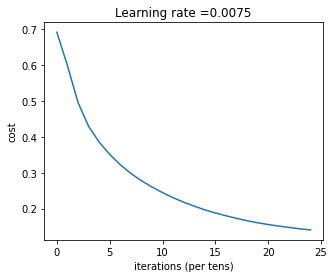

In [76]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [77]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9730000000000004


In [78]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9299999999999999


In [79]:
calculateBiasVariance(0.9730000000000004, 0.9299999999999999)

('The bias is: 0.02699999999999958', 'The variance is: 0.04300000000000048')

<h2>The Best Experiment</h2>

<h3>Base Case</h3>

In [89]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.66410993685507
Cost after iteration 200: 0.44491854262231084
Cost after iteration 300: 0.29513249135387165
Cost after iteration 400: 0.2402305322344182
Cost after iteration 500: 0.208125341013496
Cost after iteration 600: 0.18465230493511076
Cost after iteration 700: 0.16591221941331072
Cost after iteration 800: 0.1503986295403298
Cost after iteration 900: 0.13695895252045906
Cost after iteration 1000: 0.12494835606062728
Cost after iteration 1100: 0.11413356376470957
Cost after iteration 1200: 0.10433583400825591
Cost after iteration 1300: 0.09547891017863977
Cost after iteration 1400: 0.08756805571394274
Cost after iteration 1500: 0.08050292784179146
Cost after iteration 1600: 0.07423415626382414
Cost after iteration 1700: 0.06863754106130009
Cost after iteration 1800: 0.06362529794063376
Cost after iteration 1900: 0.05912240023353427
Cost after iteration 2000: 0.055077729135969804
Cost after iteration 2100: 0.051

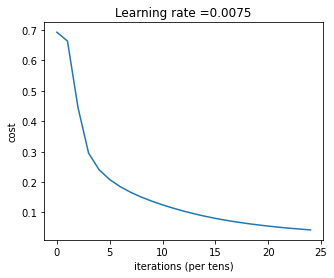

In [90]:
base_case = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [91]:
predictions_train = predict(train_x, train_y, base_case)

Accuracy: 0.9950000000000004


In [92]:
predictions_test = predict(test_x, test_y, base_case)

Accuracy: 0.95


<h4>Behavior Of The Base Case With The Validation Set</h4>

In [96]:
predictions_validate = predict(validation_x, validation_y, base_case)

Accuracy: 0.94


<h4>The pictures That The Base Case Mislabeled</h4>

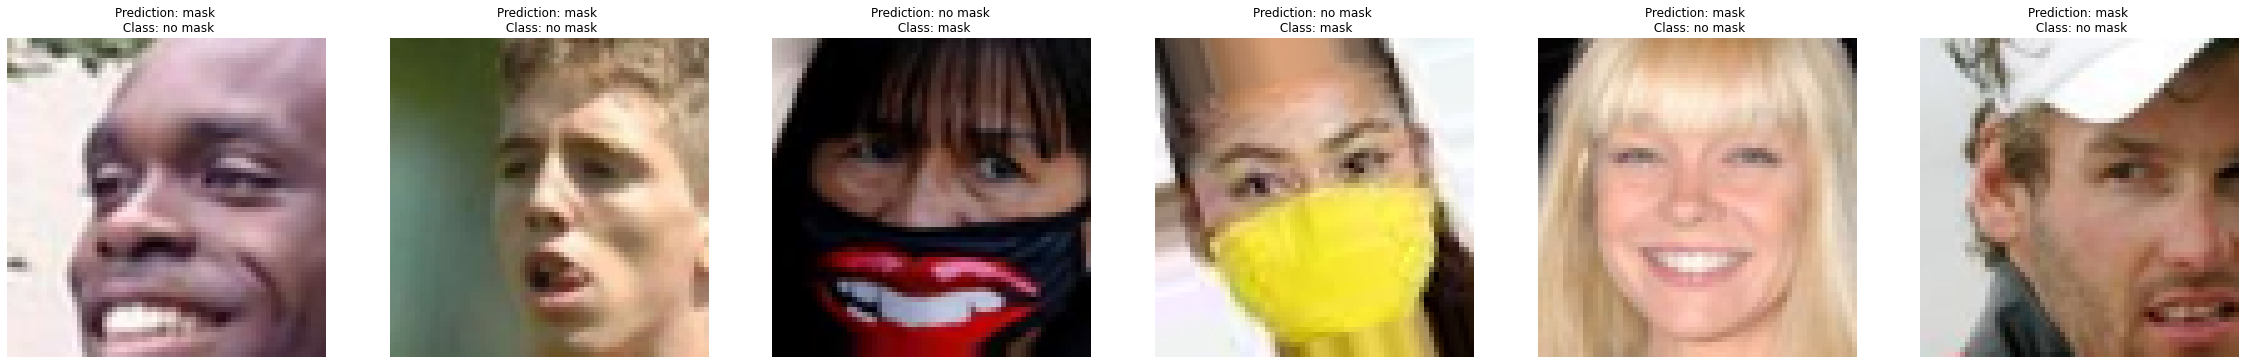

In [98]:
classes = ['no mask','mask']
print_mislabeled_images(classes, validation_x, validation_y, predictions_validate)

<h3>Experiment 3</h3>

Cost after iteration 0: 0.6929702181644898
Cost after iteration 100: 0.66410993685507
Cost after iteration 200: 0.44491854262231084
Cost after iteration 300: 0.29513249135387165
Cost after iteration 400: 0.2402305322344182
Cost after iteration 500: 0.208125341013496
Cost after iteration 600: 0.18465230493511076
Cost after iteration 700: 0.16591221941331072
Cost after iteration 800: 0.1503986295403298
Cost after iteration 900: 0.13695895252045906
Cost after iteration 1000: 0.12494835606062728
Cost after iteration 1100: 0.11413356376470957
Cost after iteration 1200: 0.10433583400825591
Cost after iteration 1300: 0.09547891017863977
Cost after iteration 1400: 0.08756805571394274
Cost after iteration 1500: 0.08050292784179146
Cost after iteration 1600: 0.07423415626382414
Cost after iteration 1700: 0.06863754106130009
Cost after iteration 1800: 0.06362529794063376
Cost after iteration 1900: 0.05912240023353427
Cost after iteration 2000: 0.055077729135969804
Cost after iteration 2100: 0.051

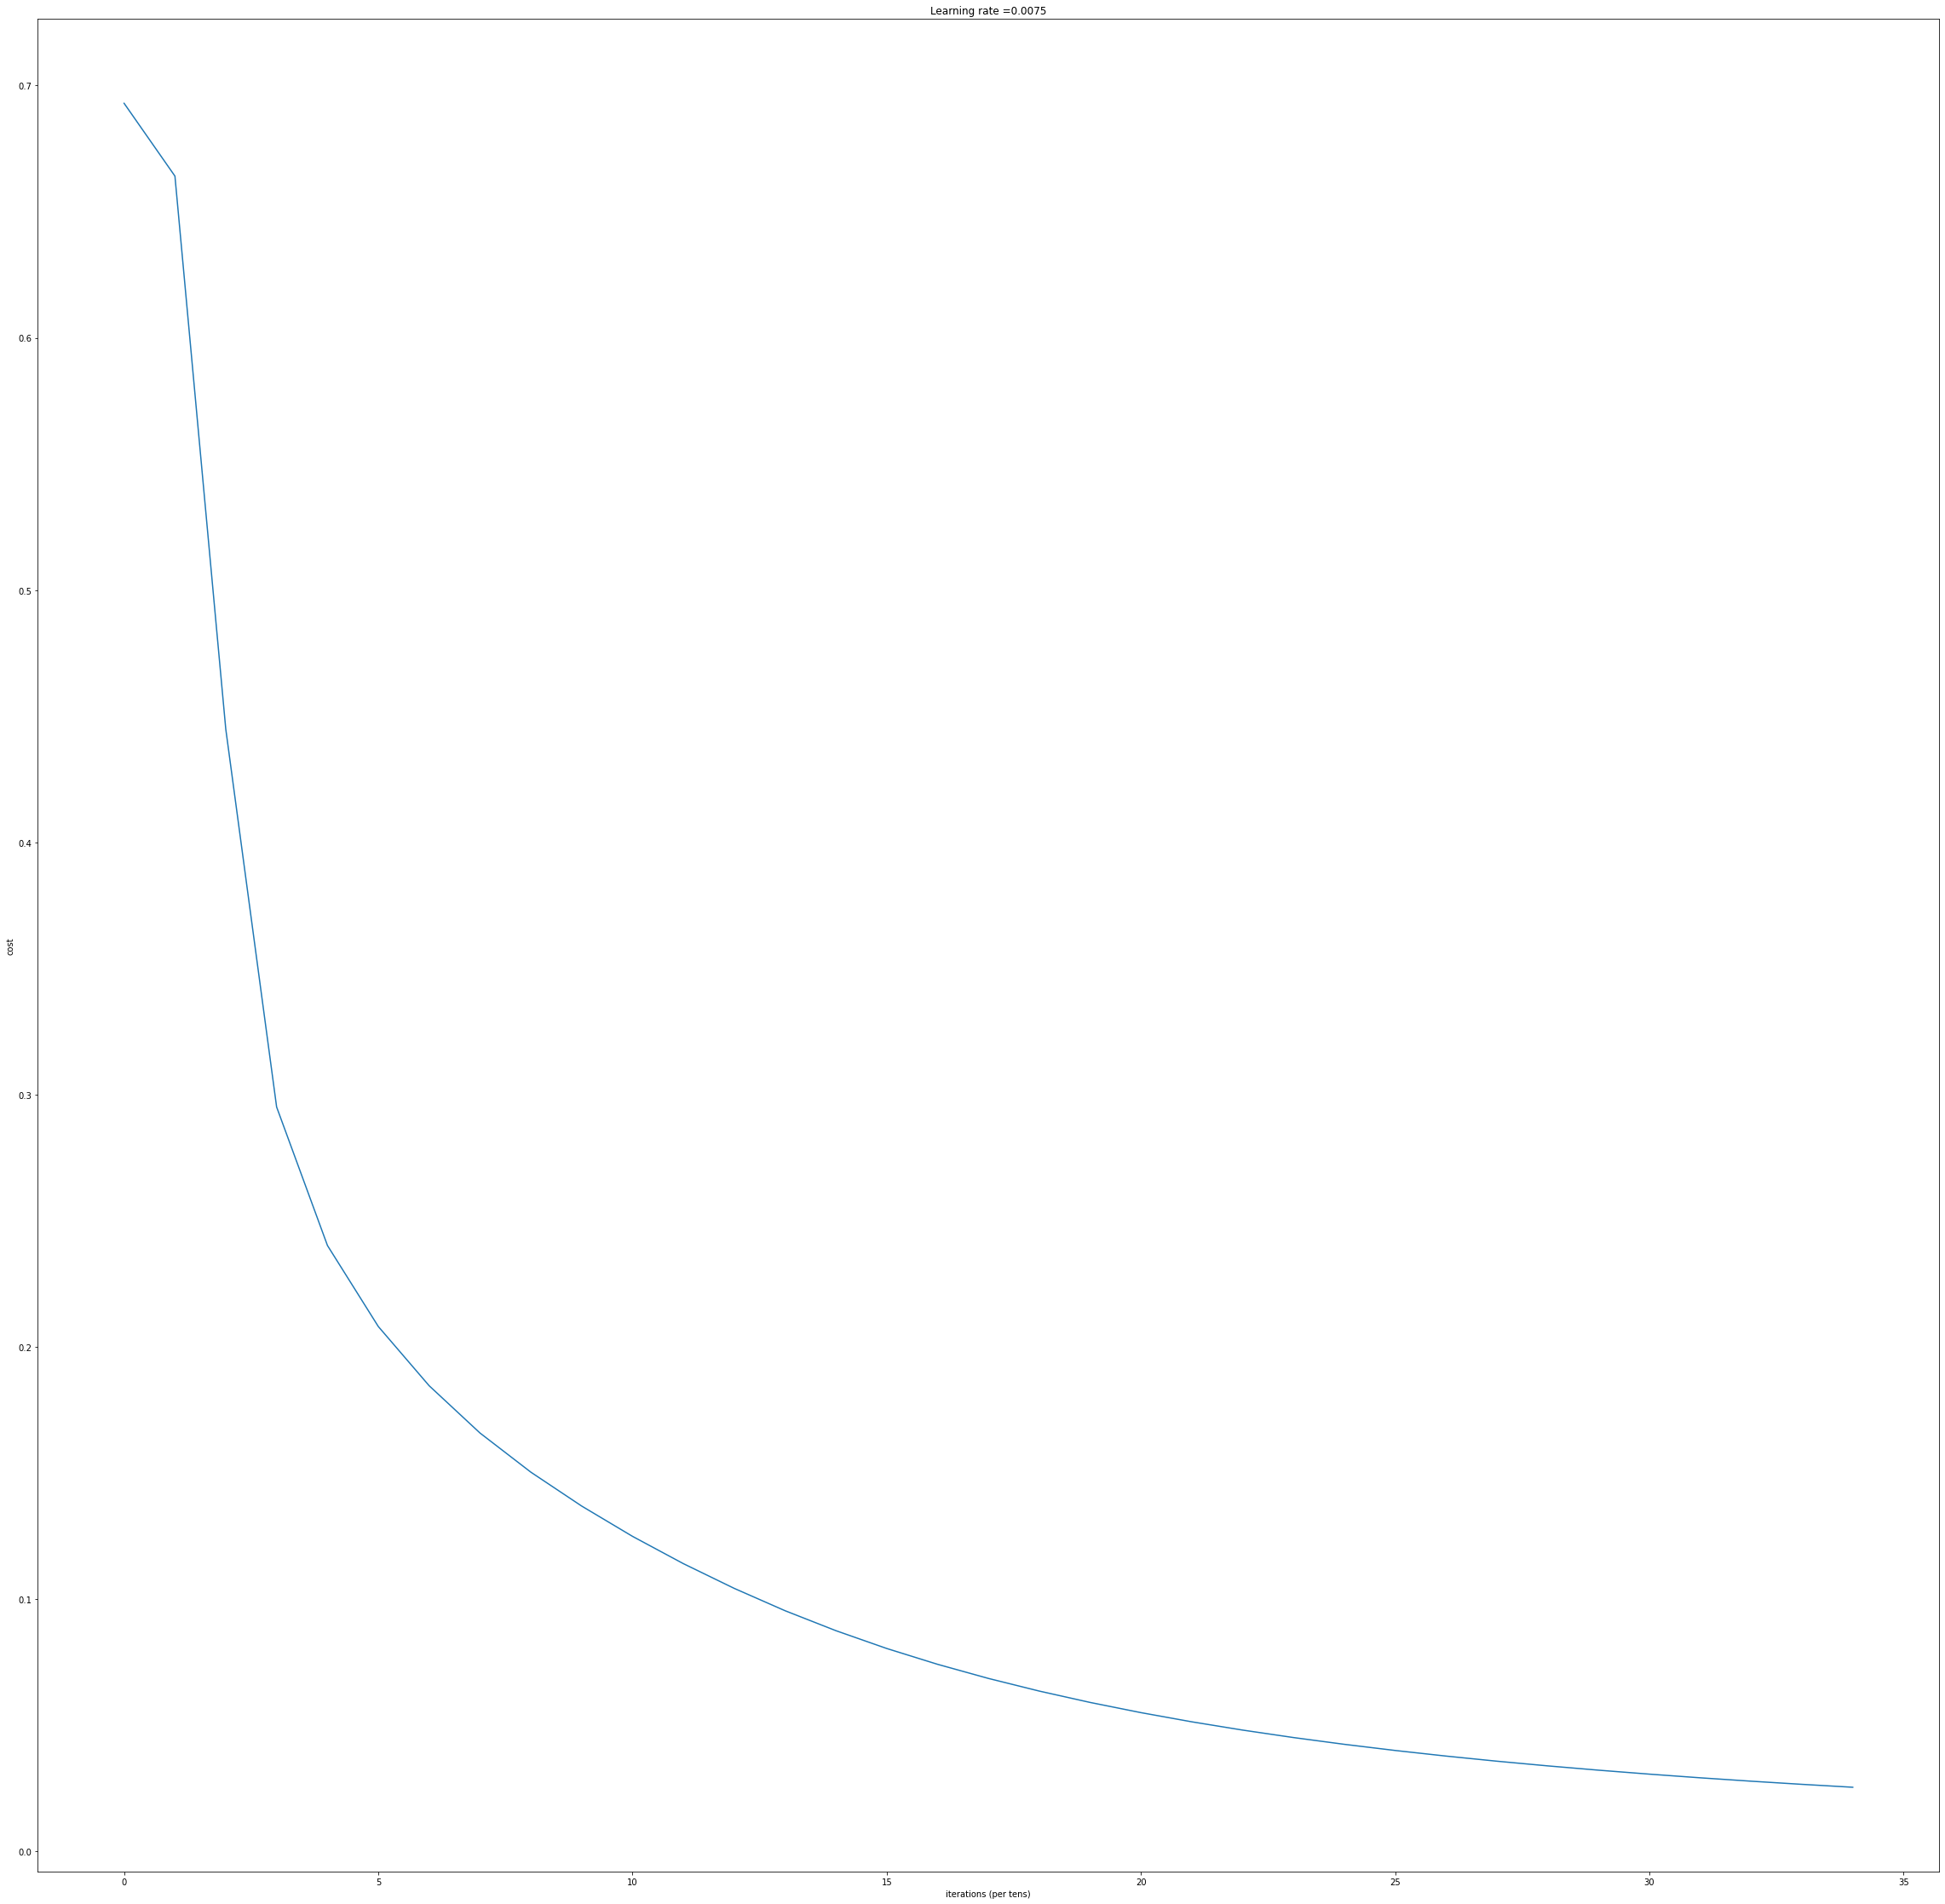

In [99]:
third_experiment = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.0075, num_iterations = 3500, print_cost=True)

In [100]:
predictions_train = predict(train_x, train_y, third_experiment)

Accuracy: 0.9970000000000004


In [101]:
predictions_test = predict(test_x, test_y, third_experiment)

Accuracy: 0.95


<h4>Behavior Of The Third Experiment With The Validation Set</h4>

In [103]:
predictions_validate = predict(validation_x, validation_y, third_experiment)

Accuracy: 0.94


<h4>The pictures That The Third Experiment Mislabeled</h4>

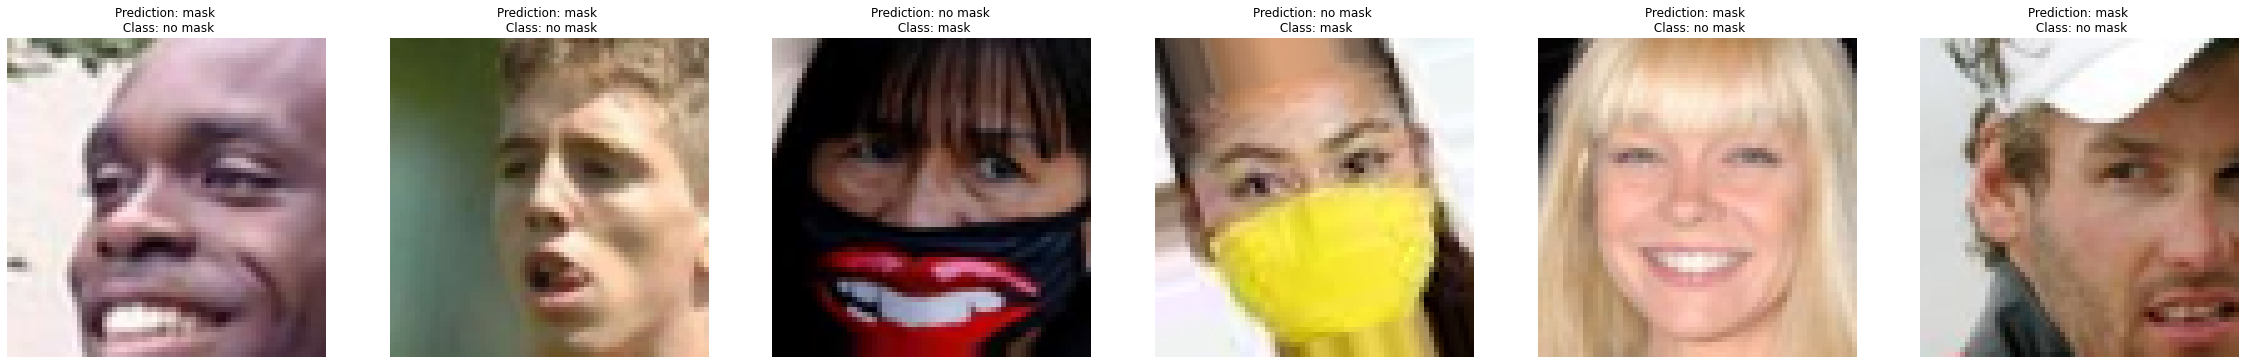

In [105]:
classes = ['no mask','mask']
print_mislabeled_images(classes, validation_x, validation_y, predictions_validate)